In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format',lambda x: '{: .2f}'.format(x))
np.set_printoptions(suppress=True)


In [3]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [4]:
df_customers.shape, df_loans.shape, df_bureau.shape


((50000, 12), (50000, 15), (50000, 8))

In [5]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [6]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df = pd.merge(df_customers,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df,df_bureau)
df.head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default']= df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
x = df.drop("default",axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train,y_train],axis='columns')
df_test = pd.concat([X_test,y_test],axis='columns')

df_train.head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [12]:
df_train.loan_amount

12746    23442000
32495     1149000
43675    11296000
9040      1695000
13077      905000
           ...   
28515     1420000
5558      2753000
45236     4479000
49228     1890000
37784     7240000
Name: loan_amount, Length: 37500, dtype: int64

In [13]:
df_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,2021-06-24,2021-07-23,2,1,42,0,0,5,98,0
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,2021-02-09,2021-02-18,4,0,125,0,0,5,32,0
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,2022-08-06,2022-08-21,3,0,76,0,0,6,82,0
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2023-02-03,2023-02-04,4,2,125,3,21,7,48,0
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,2023-09-27,2023-10-17,3,1,131,14,89,8,97,1


In [14]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [15]:
numeric_df=df_train.select_dtypes(int)

In [16]:
numeric_df.columns


Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [17]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [20]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence,inplace=True)

df_train.residence_type.unique(),df_test.residence_type.unique()

C:\Users\LAKSHAY\AppData\Local\Temp\ipykernel_12148\3281324573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
C:\Users\LAKSHAY\AppData\Local\Temp\ipykernel_12148\3281324573.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [21]:
df_train.duplicated().sum()

np.int64(0)

In [22]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.54,2633326.16,1.94,16.00,418866.25,4699691.57,3996067.73,80290.68,719292.19,3196854.19,...,1333819.51,986298.87,2.50,1.00,76.11,4.84,26.67,5.01,43.42,0.09
std,9.86,2623780.52,1.54,8.92,169035.02,6257832.98,5371862.29,113128.14,966935.21,4297489.83,...,1213674.44,1043145.01,1.12,0.81,43.77,5.84,32.78,2.03,29.39,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,802000.00,0.00,8.00,302001.00,1142000.00,961000.00,19220.00,172980.00,768800.00,...,422197.50,287040.25,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,39.00,1885000.00,2.00,16.00,400001.00,2644000.00,2230000.00,44600.00,401400.00,1784000.00,...,997427.50,665014.50,3.00,1.00,71.00,3.00,13.00,5.00,39.00,0.00
75%,46.00,3326250.00,3.00,24.00,560001.00,5178000.00,4619000.00,92420.00,831420.00,3695200.00,...,1784879.00,1234062.75,4.00,2.00,107.00,8.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5293543.52,8607420.00,38255200.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


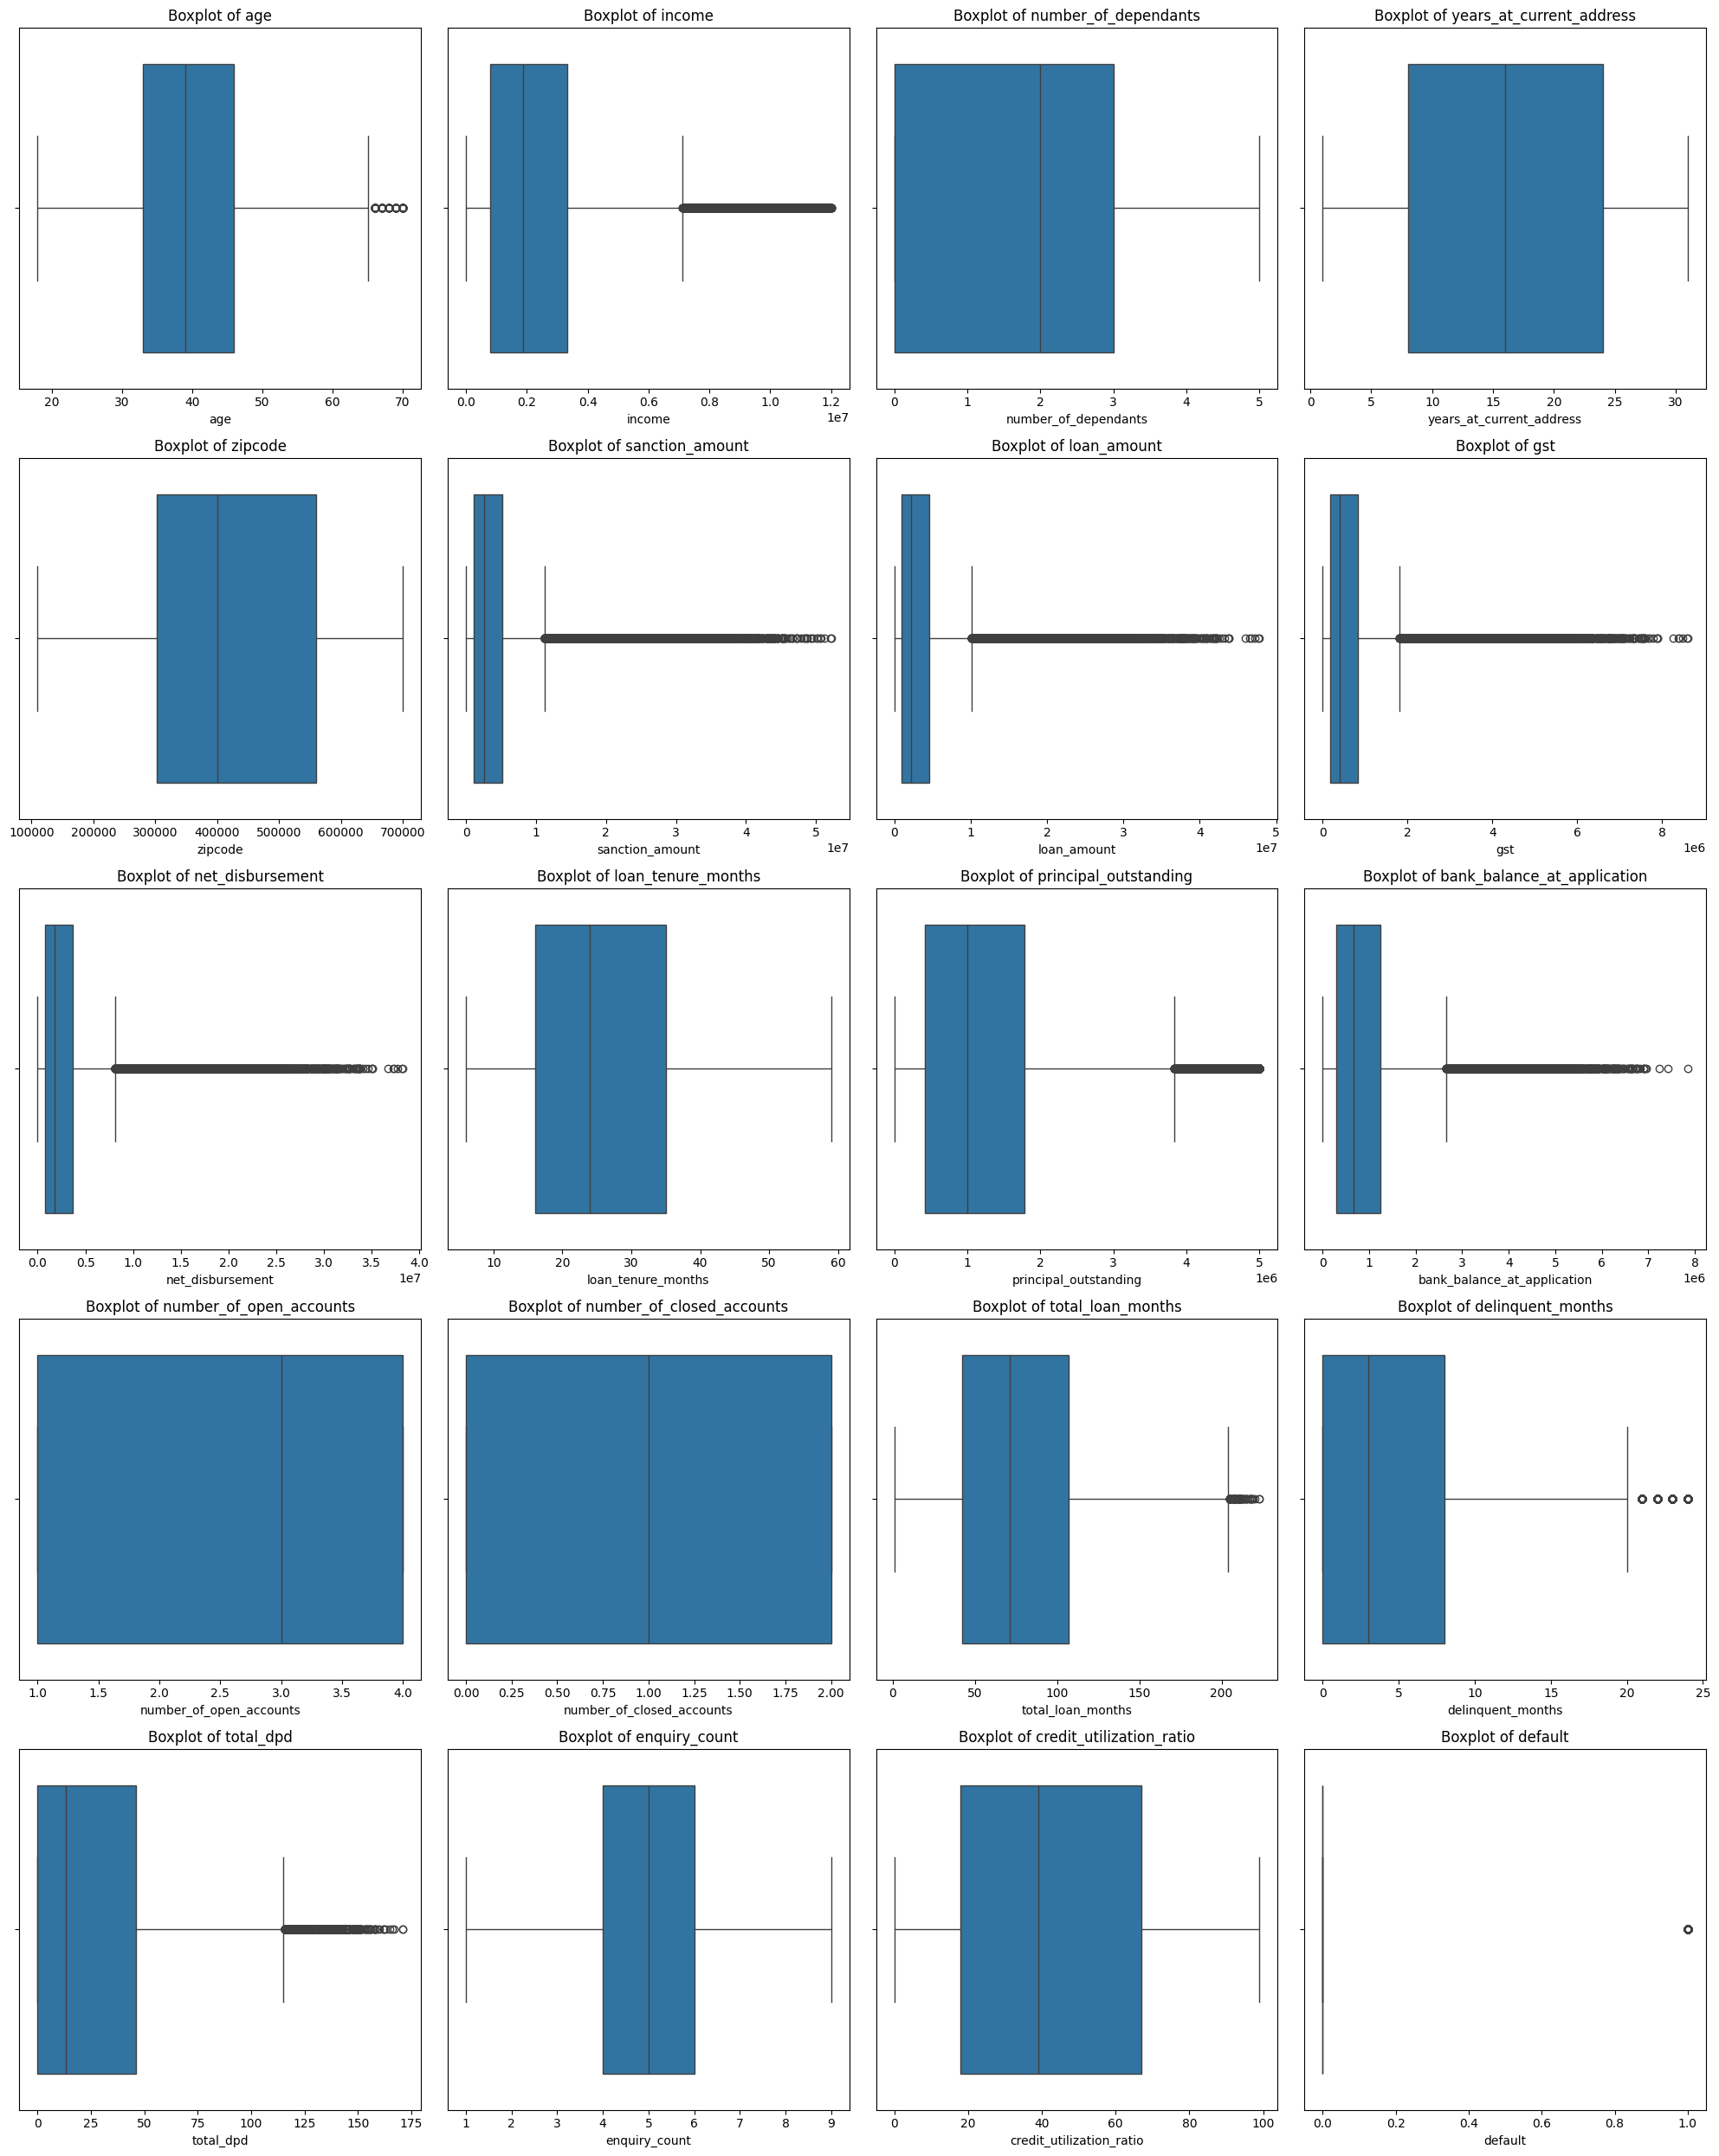

In [23]:
num_cols = len(numeric_df.columns)
rows = (num_cols + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

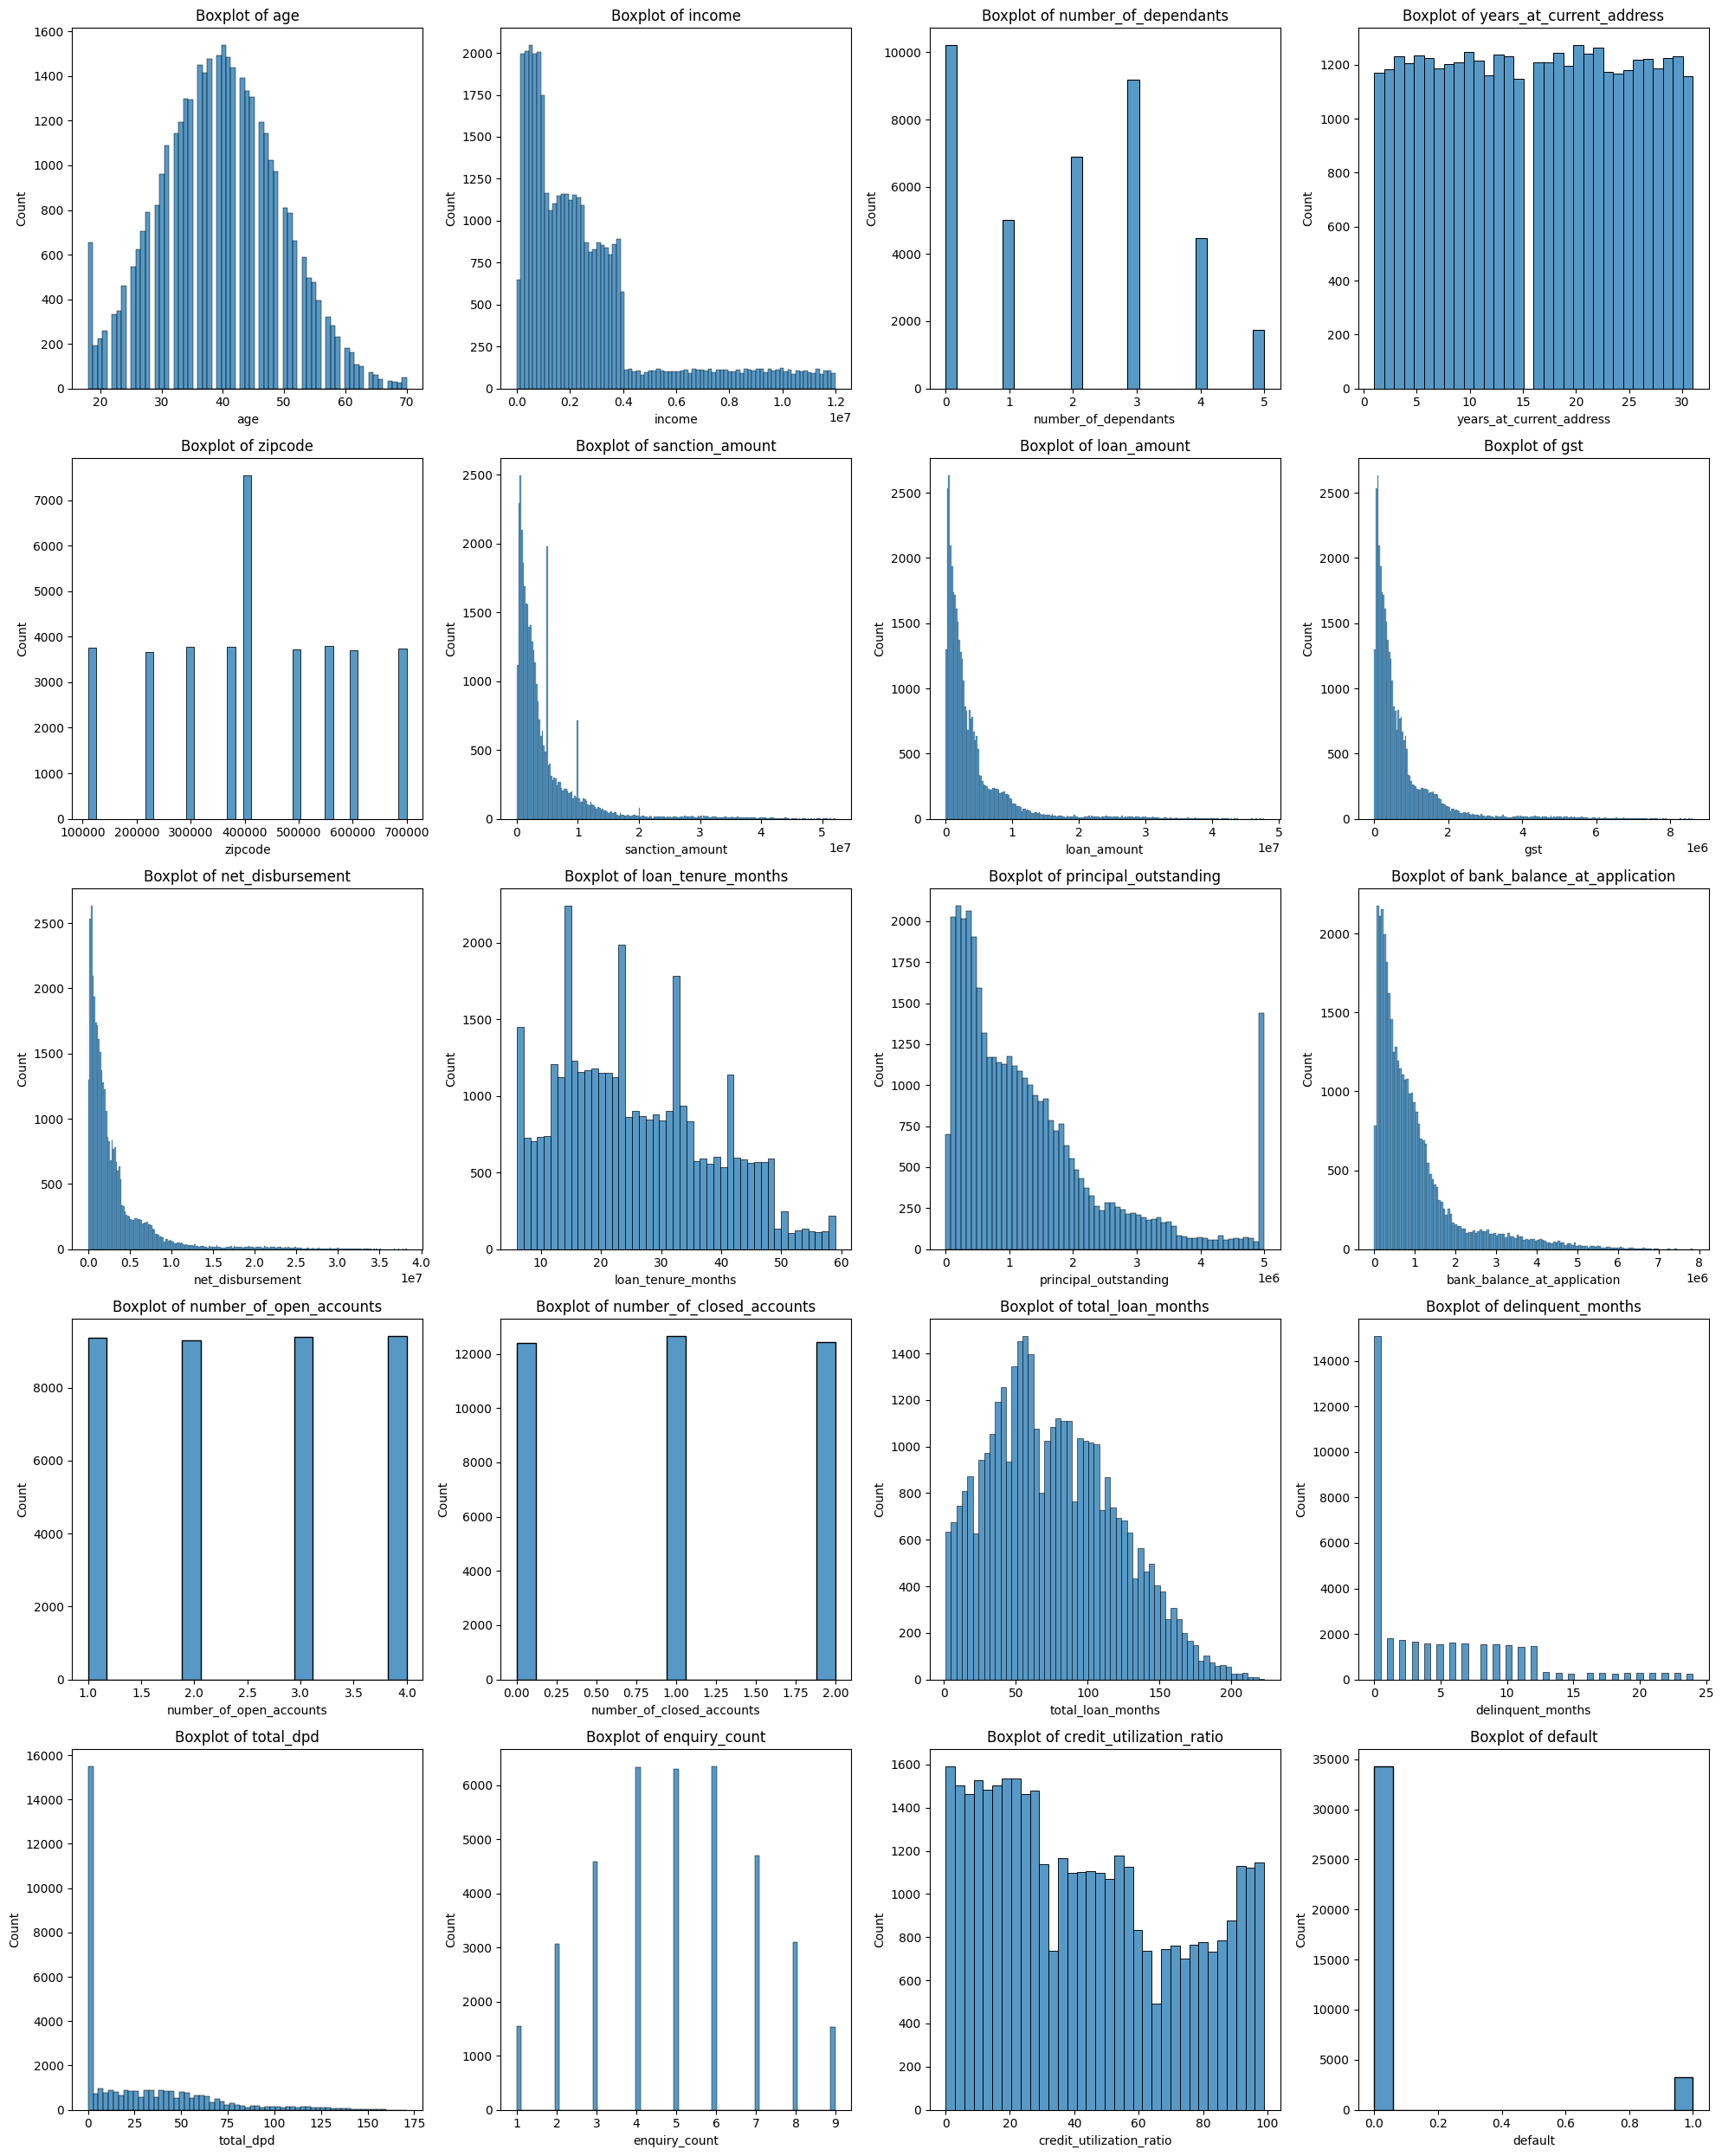

In [24]:
num_cols = len(numeric_df.columns)
rows = (num_cols + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, col in enumerate(numeric_df.columns):
    sns.histplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [25]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

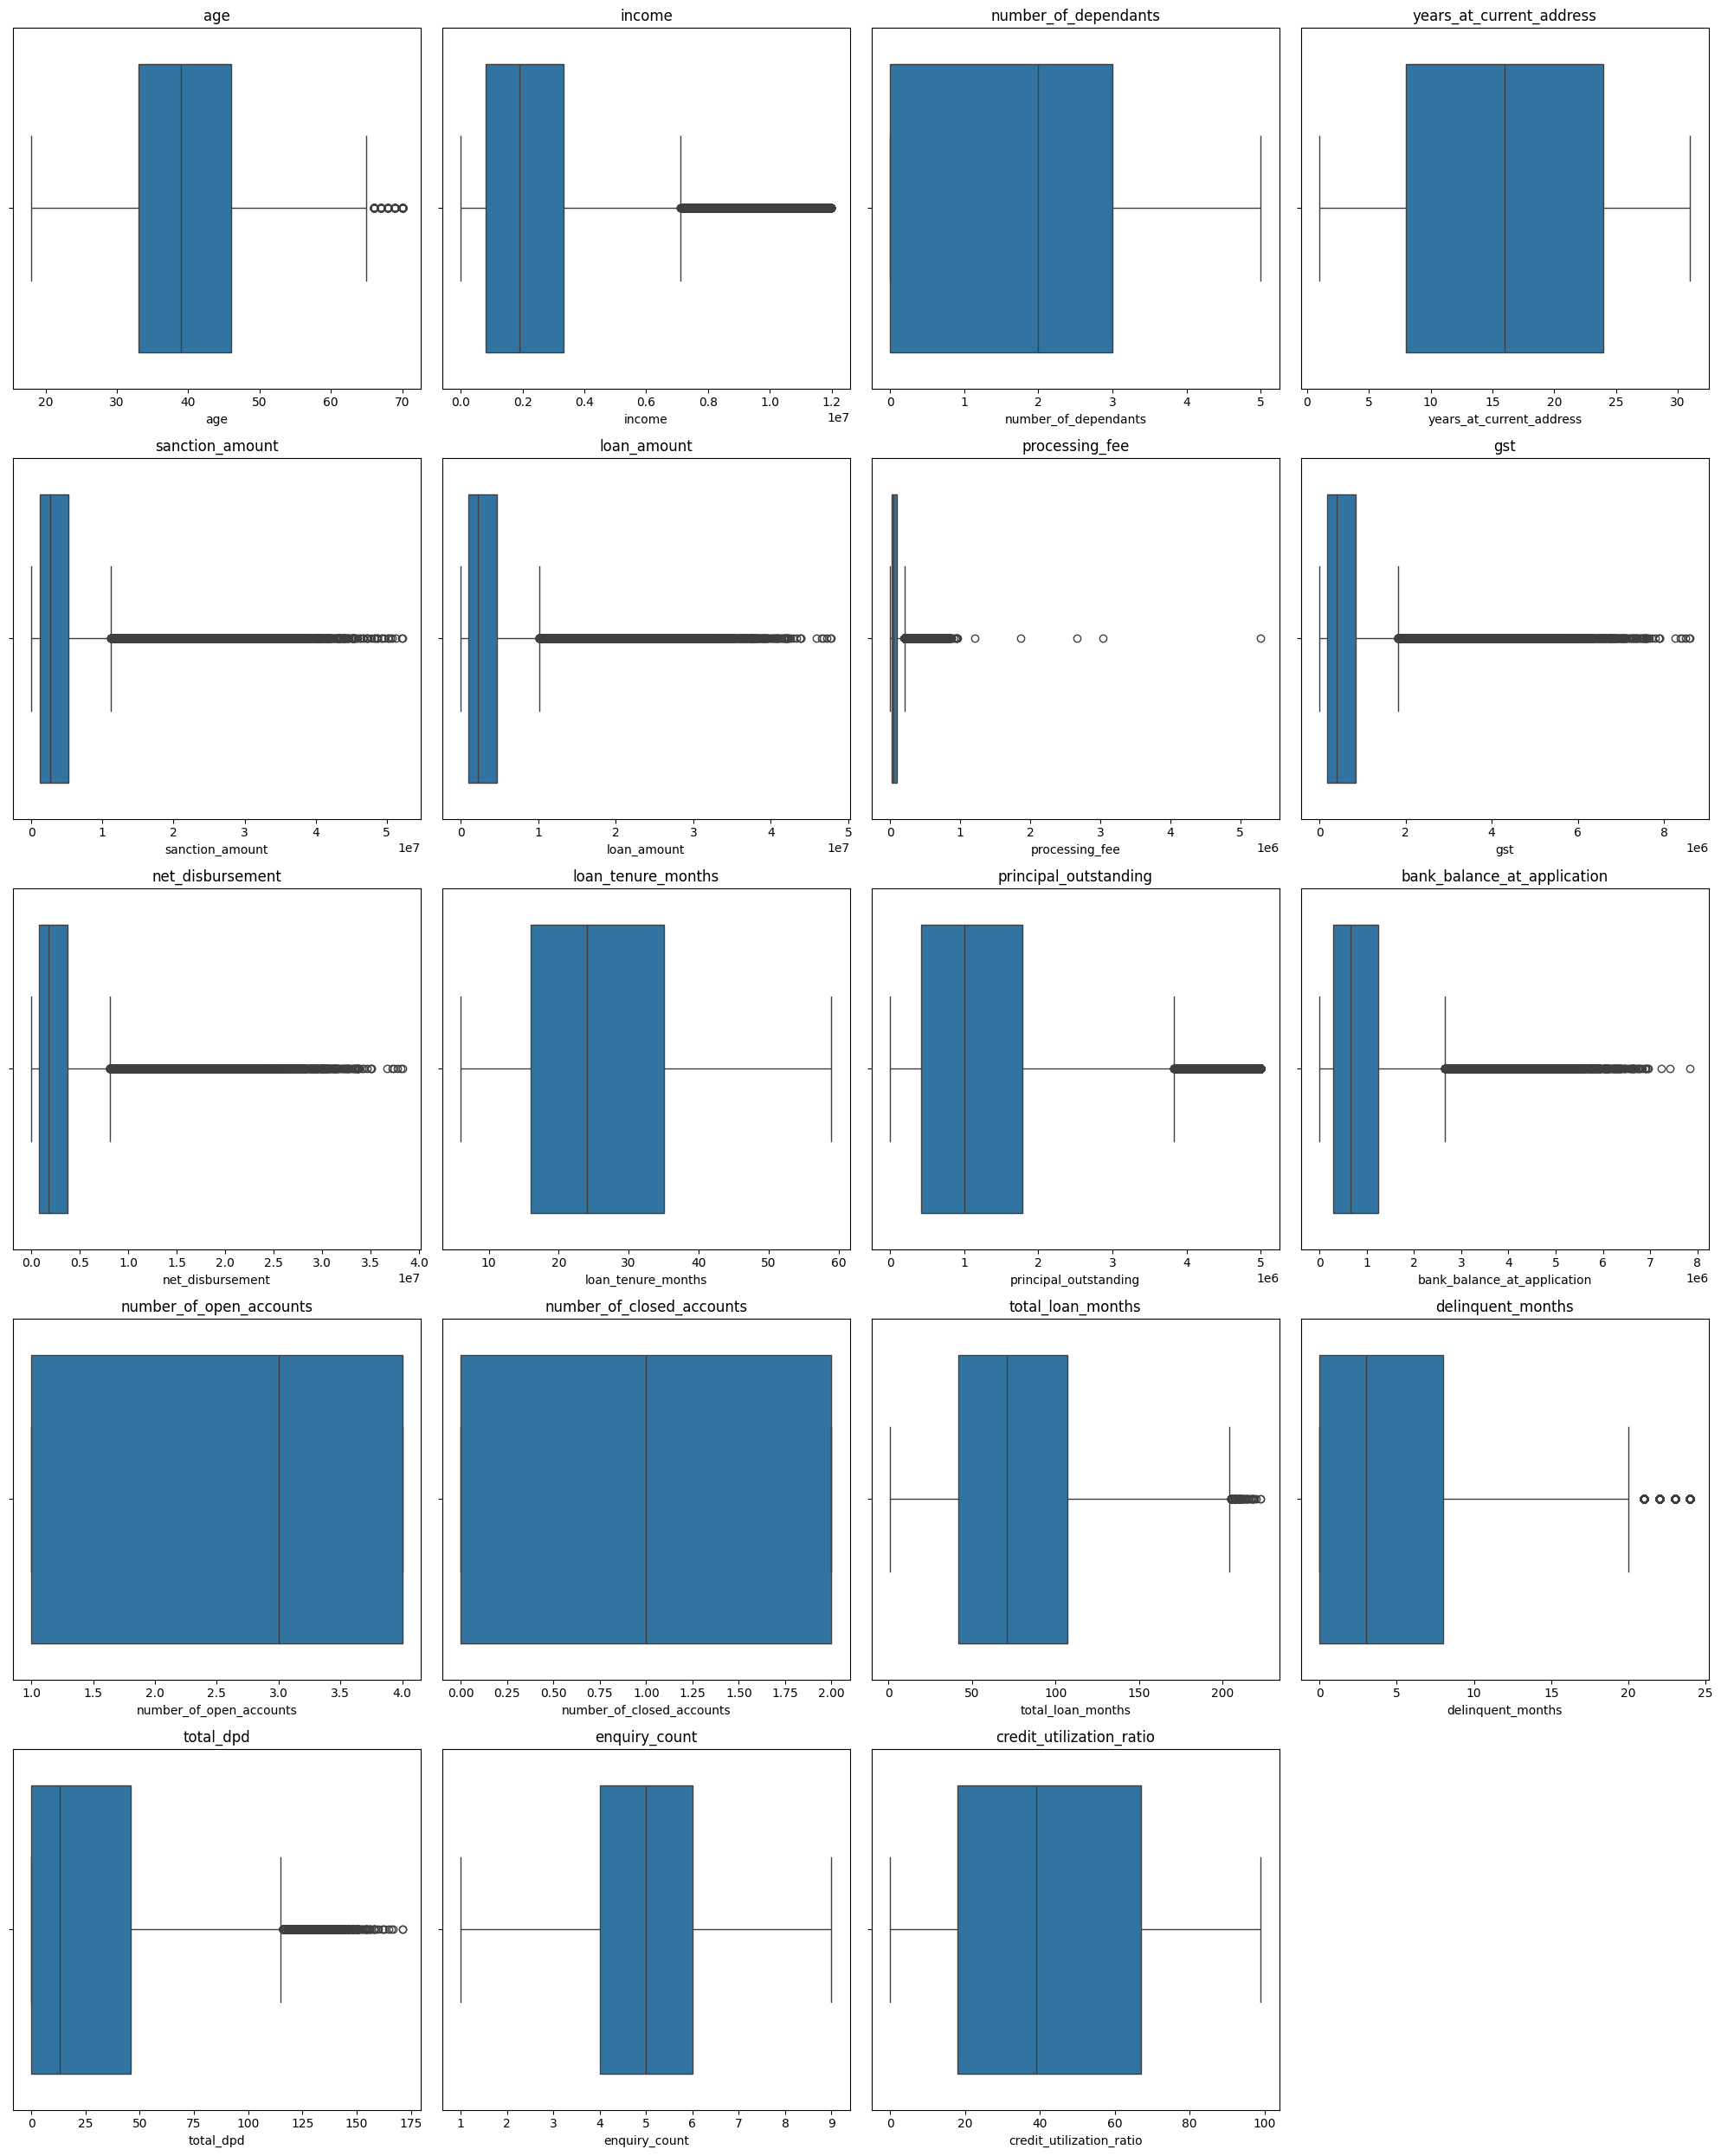

In [26]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
df_train.processing_fee.describe()

count      37500.00
mean       80290.68
std       113128.14
min            0.00
25%        19220.00
50%        44600.00
75%        92420.00
max      5293543.52
Name: processing_fee, dtype: float64

In [28]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [29]:
df_train.loan_amount

12746    23442000
32495     1149000
43675    11296000
9040      1695000
13077      905000
           ...   
28515     1420000
5558      2753000
45236     4479000
49228     1890000
37784     7240000
Name: loan_amount, Length: 37500, dtype: int64

In [30]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37488, 33)

In [31]:
df_train_1.head(4)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0


In [32]:
df_train_1.loan_amount

12746    23442000
32495     1149000
43675    11296000
9040      1695000
13077      905000
           ...   
28515     1420000
5558      2753000
45236     4479000
49228     1890000
37784     7240000
Name: loan_amount, Length: 37488, dtype: int64

In [33]:
df_test.residence_type.isna().sum()

np.int64(0)

In [34]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12497, 33)

In [35]:
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2].shape

(0, 33)

In [36]:
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

In [37]:
df_train_1.loan_amount

12746    23442000
32495     1149000
43675    11296000
9040      1695000
13077      905000
           ...   
28515     1420000
5558      2753000
45236     4479000
49228     1890000
37784     7240000
Name: loan_amount, Length: 37488, dtype: int64

### Analyze Categorical Columns

In [38]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [39]:
for col in columns_categorical:
    print(col, "-->", df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


#### help in changing personaal 

In [40]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [41]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

<h3 align="center" style="color:blue" >Exploratory Data Analysis</h3>

In [42]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

In [43]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.00,39.77,9.88,18.00,33.00,40.00,46.00,70.00
1,3223.00,37.12,9.29,18.00,31.00,37.00,44.00,70.00


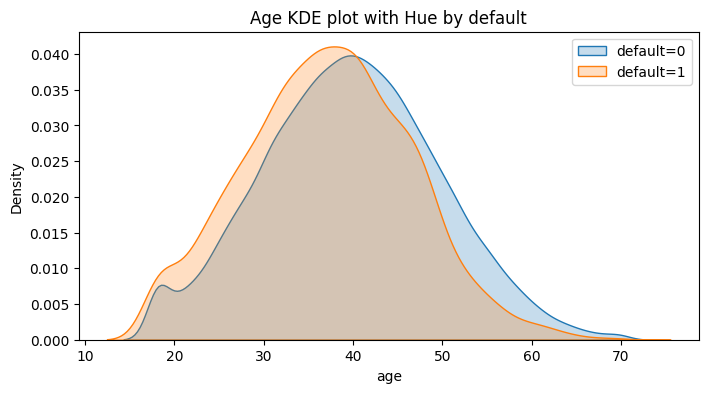

In [44]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train_1['age'][df_train_1['default']==0],fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default']==1],fill=True,label='default=1')
plt.title("Age KDE plot with Hue by default")
plt.legend()
plt.show()

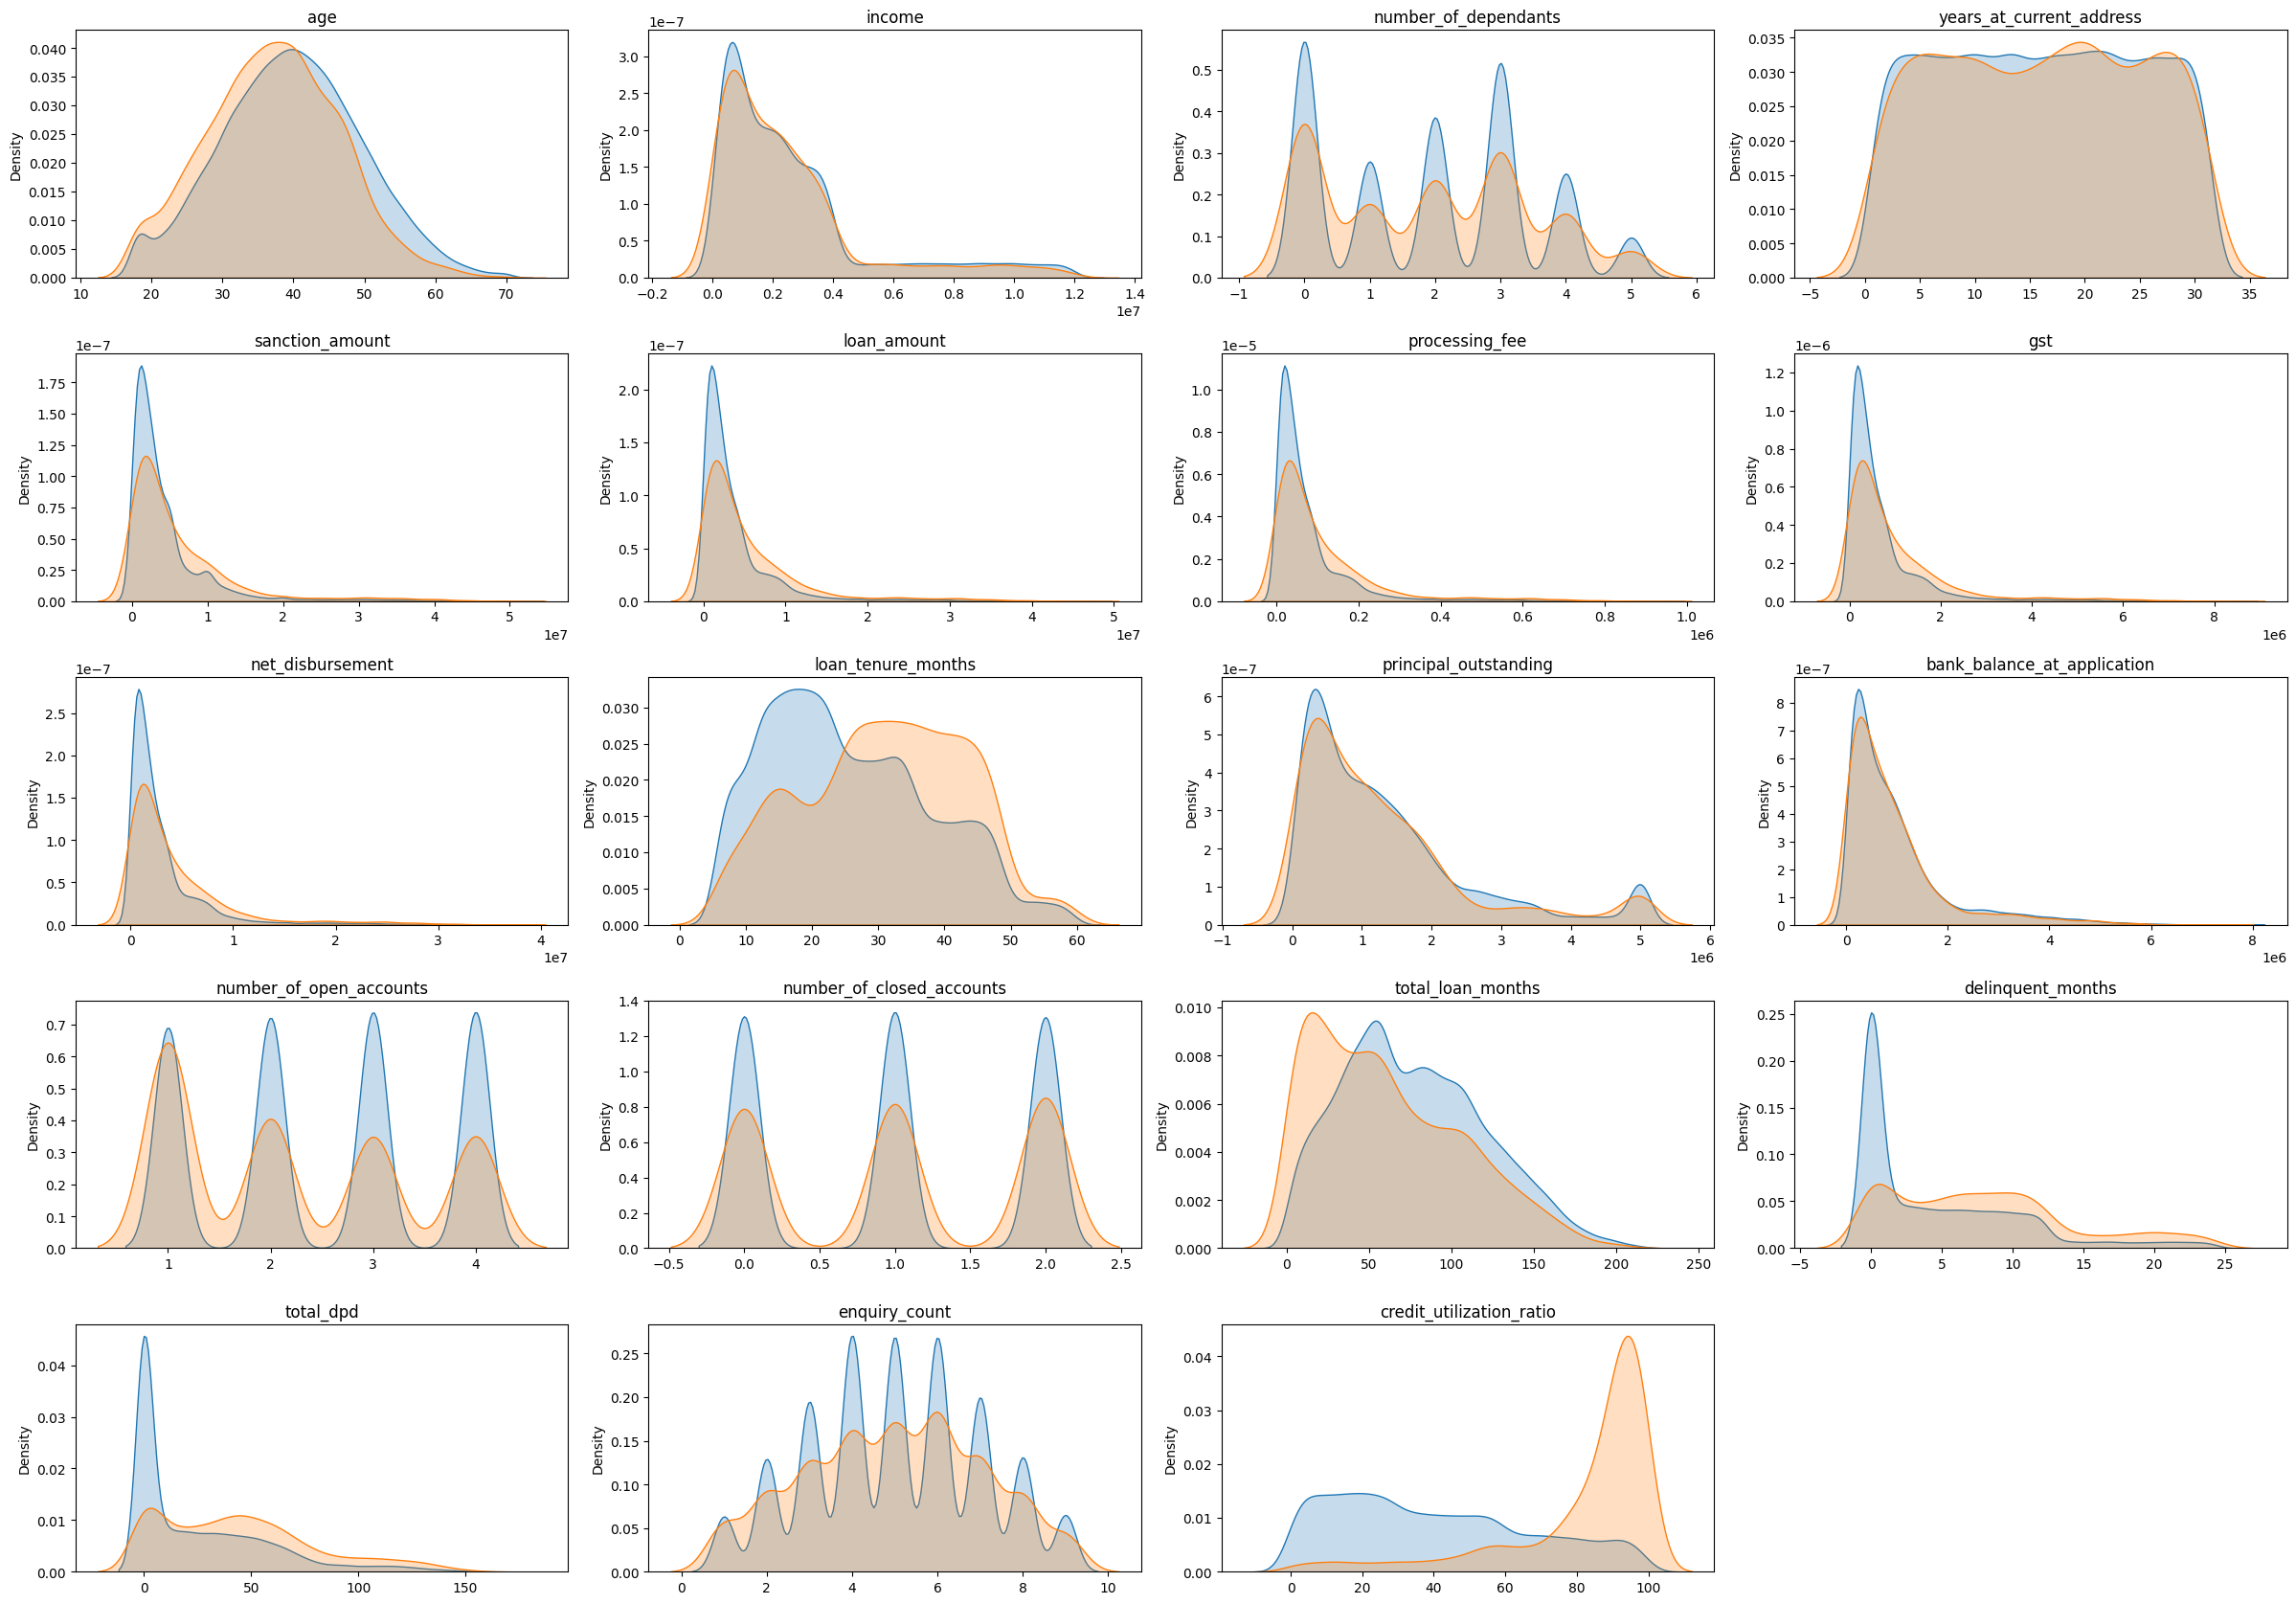

In [ ]:
plt.figure(figsize=(24,20))

for i,col in enumerate(columns_continuous):
    plt.subplot(6, 4 , i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [46]:
df_train_1.loan_amount


12746    23442000
32495     1149000
43675    11296000
9040      1695000
13077      905000
           ...   
28515     1420000
5558      2753000
45236     4479000
49228     1890000
37784     7240000
Name: loan_amount, Length: 37488, dtype: int64

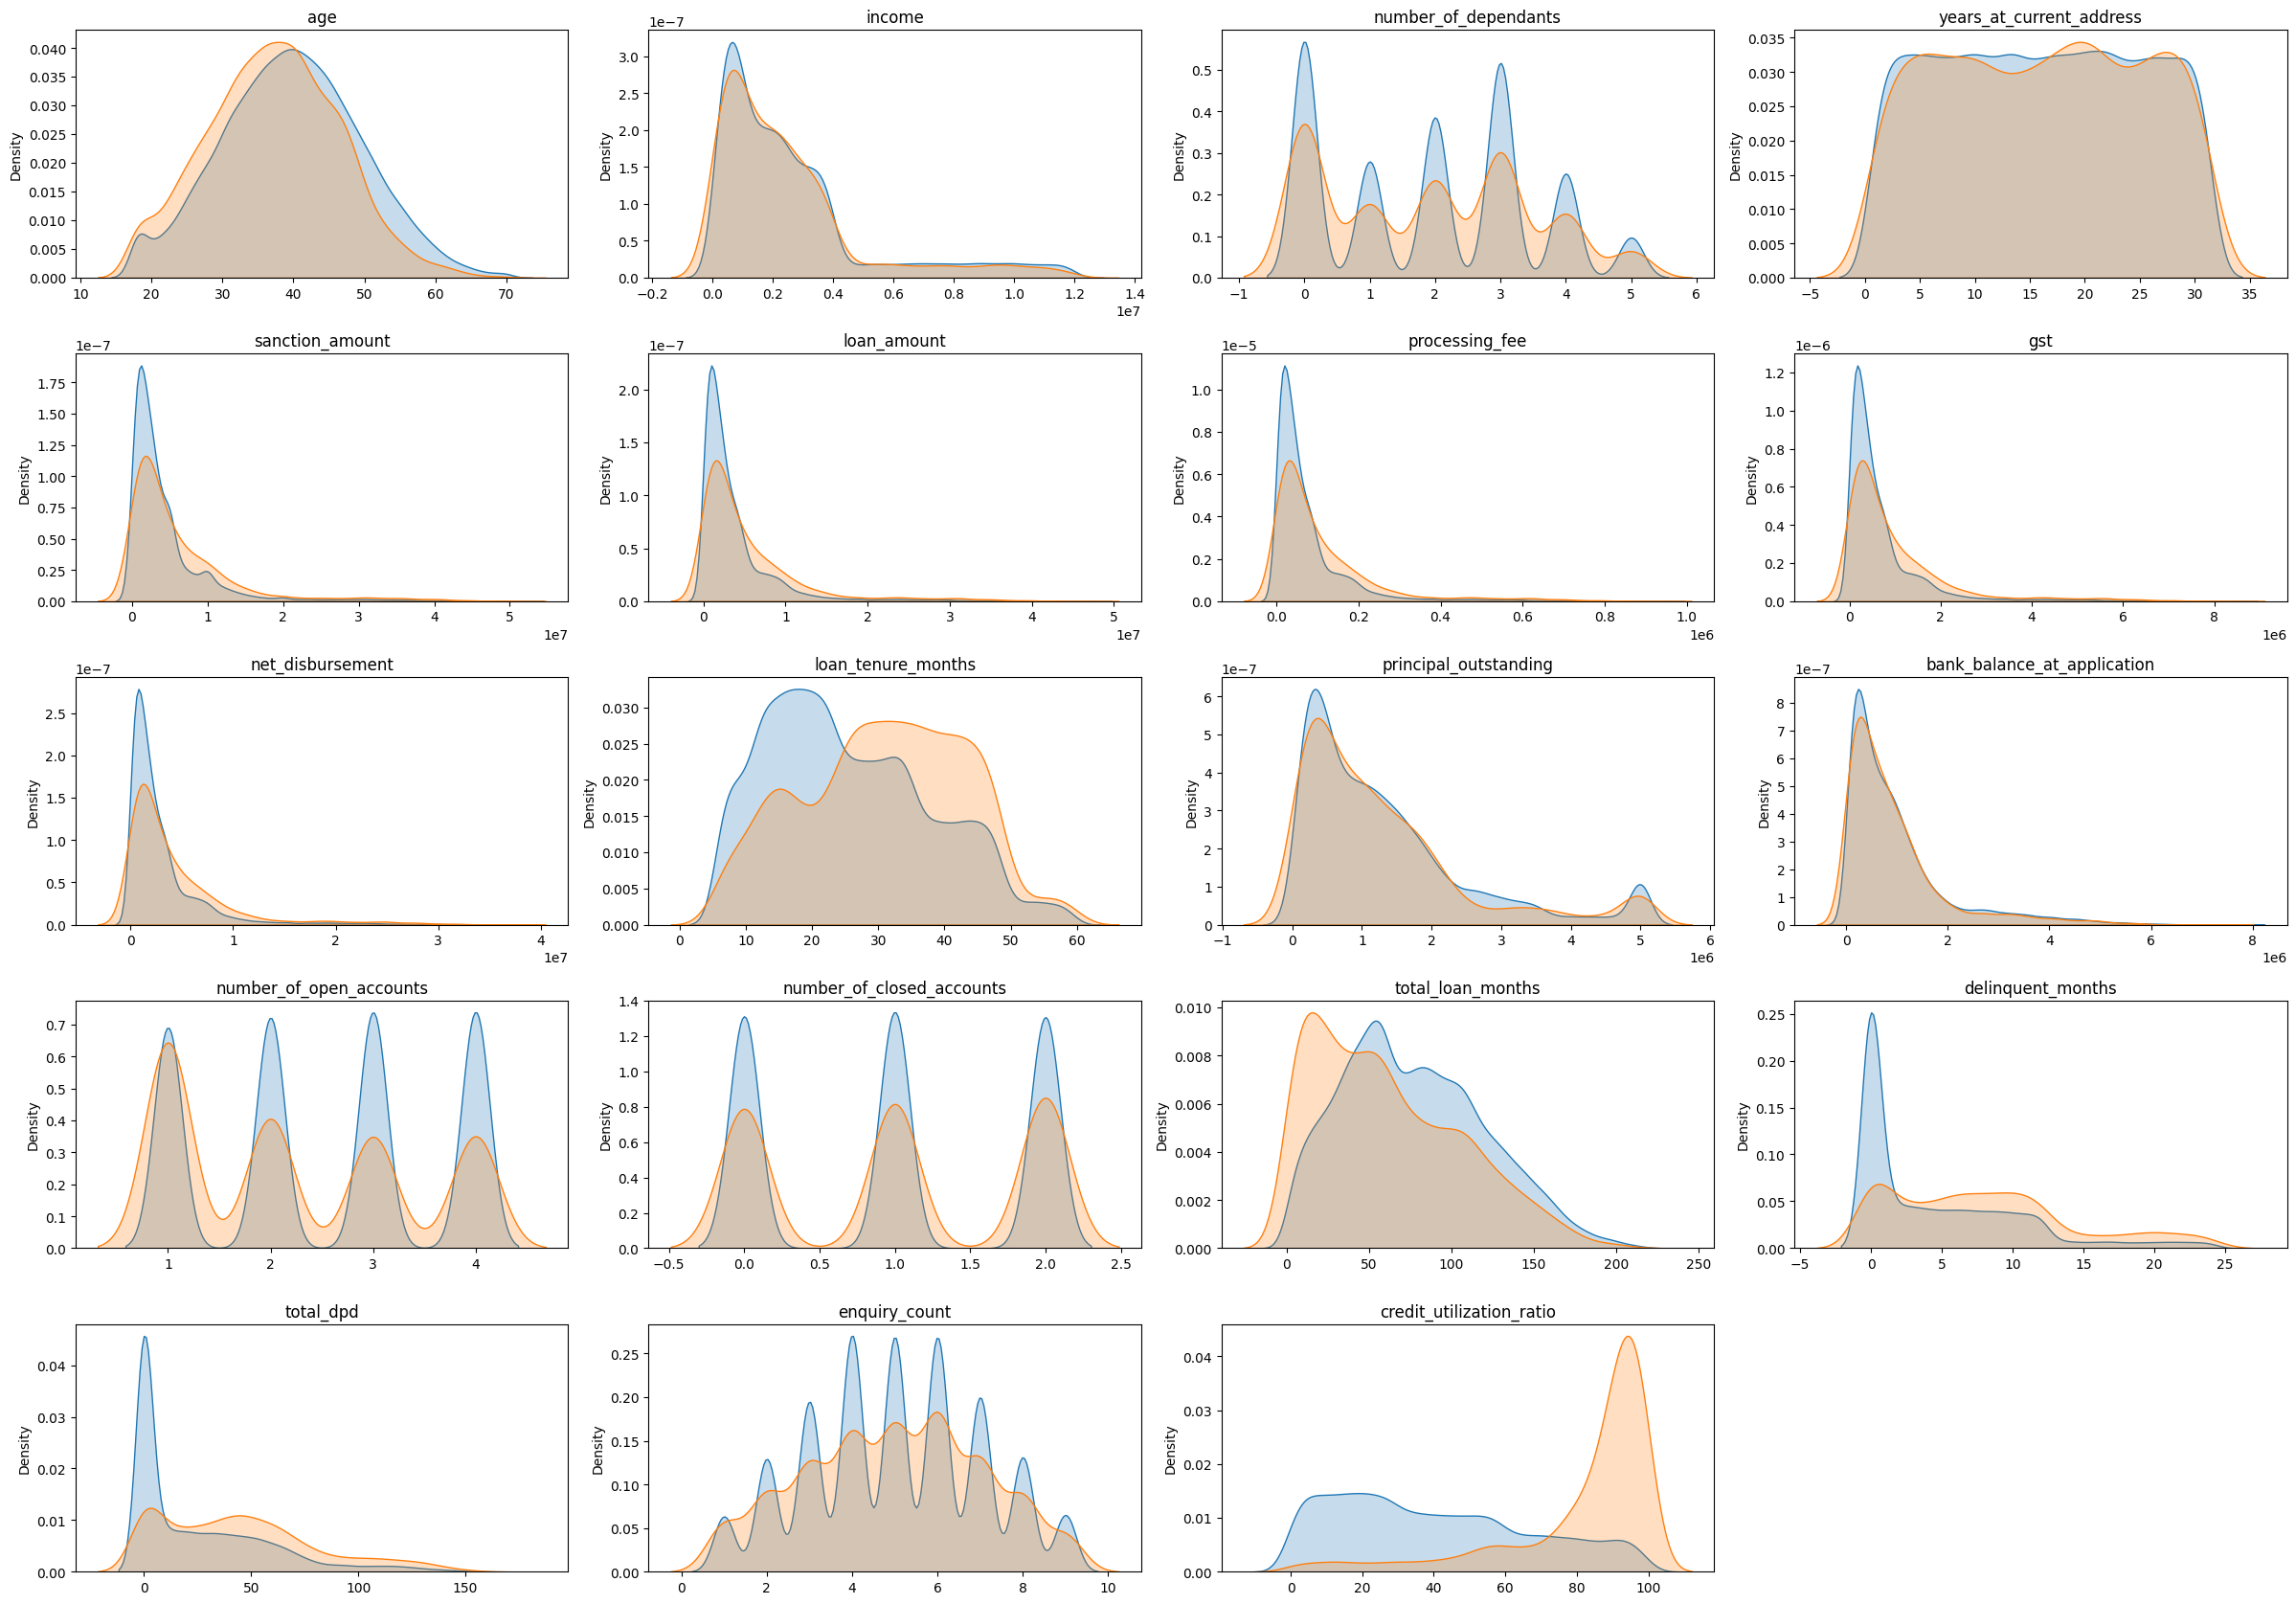

In [47]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

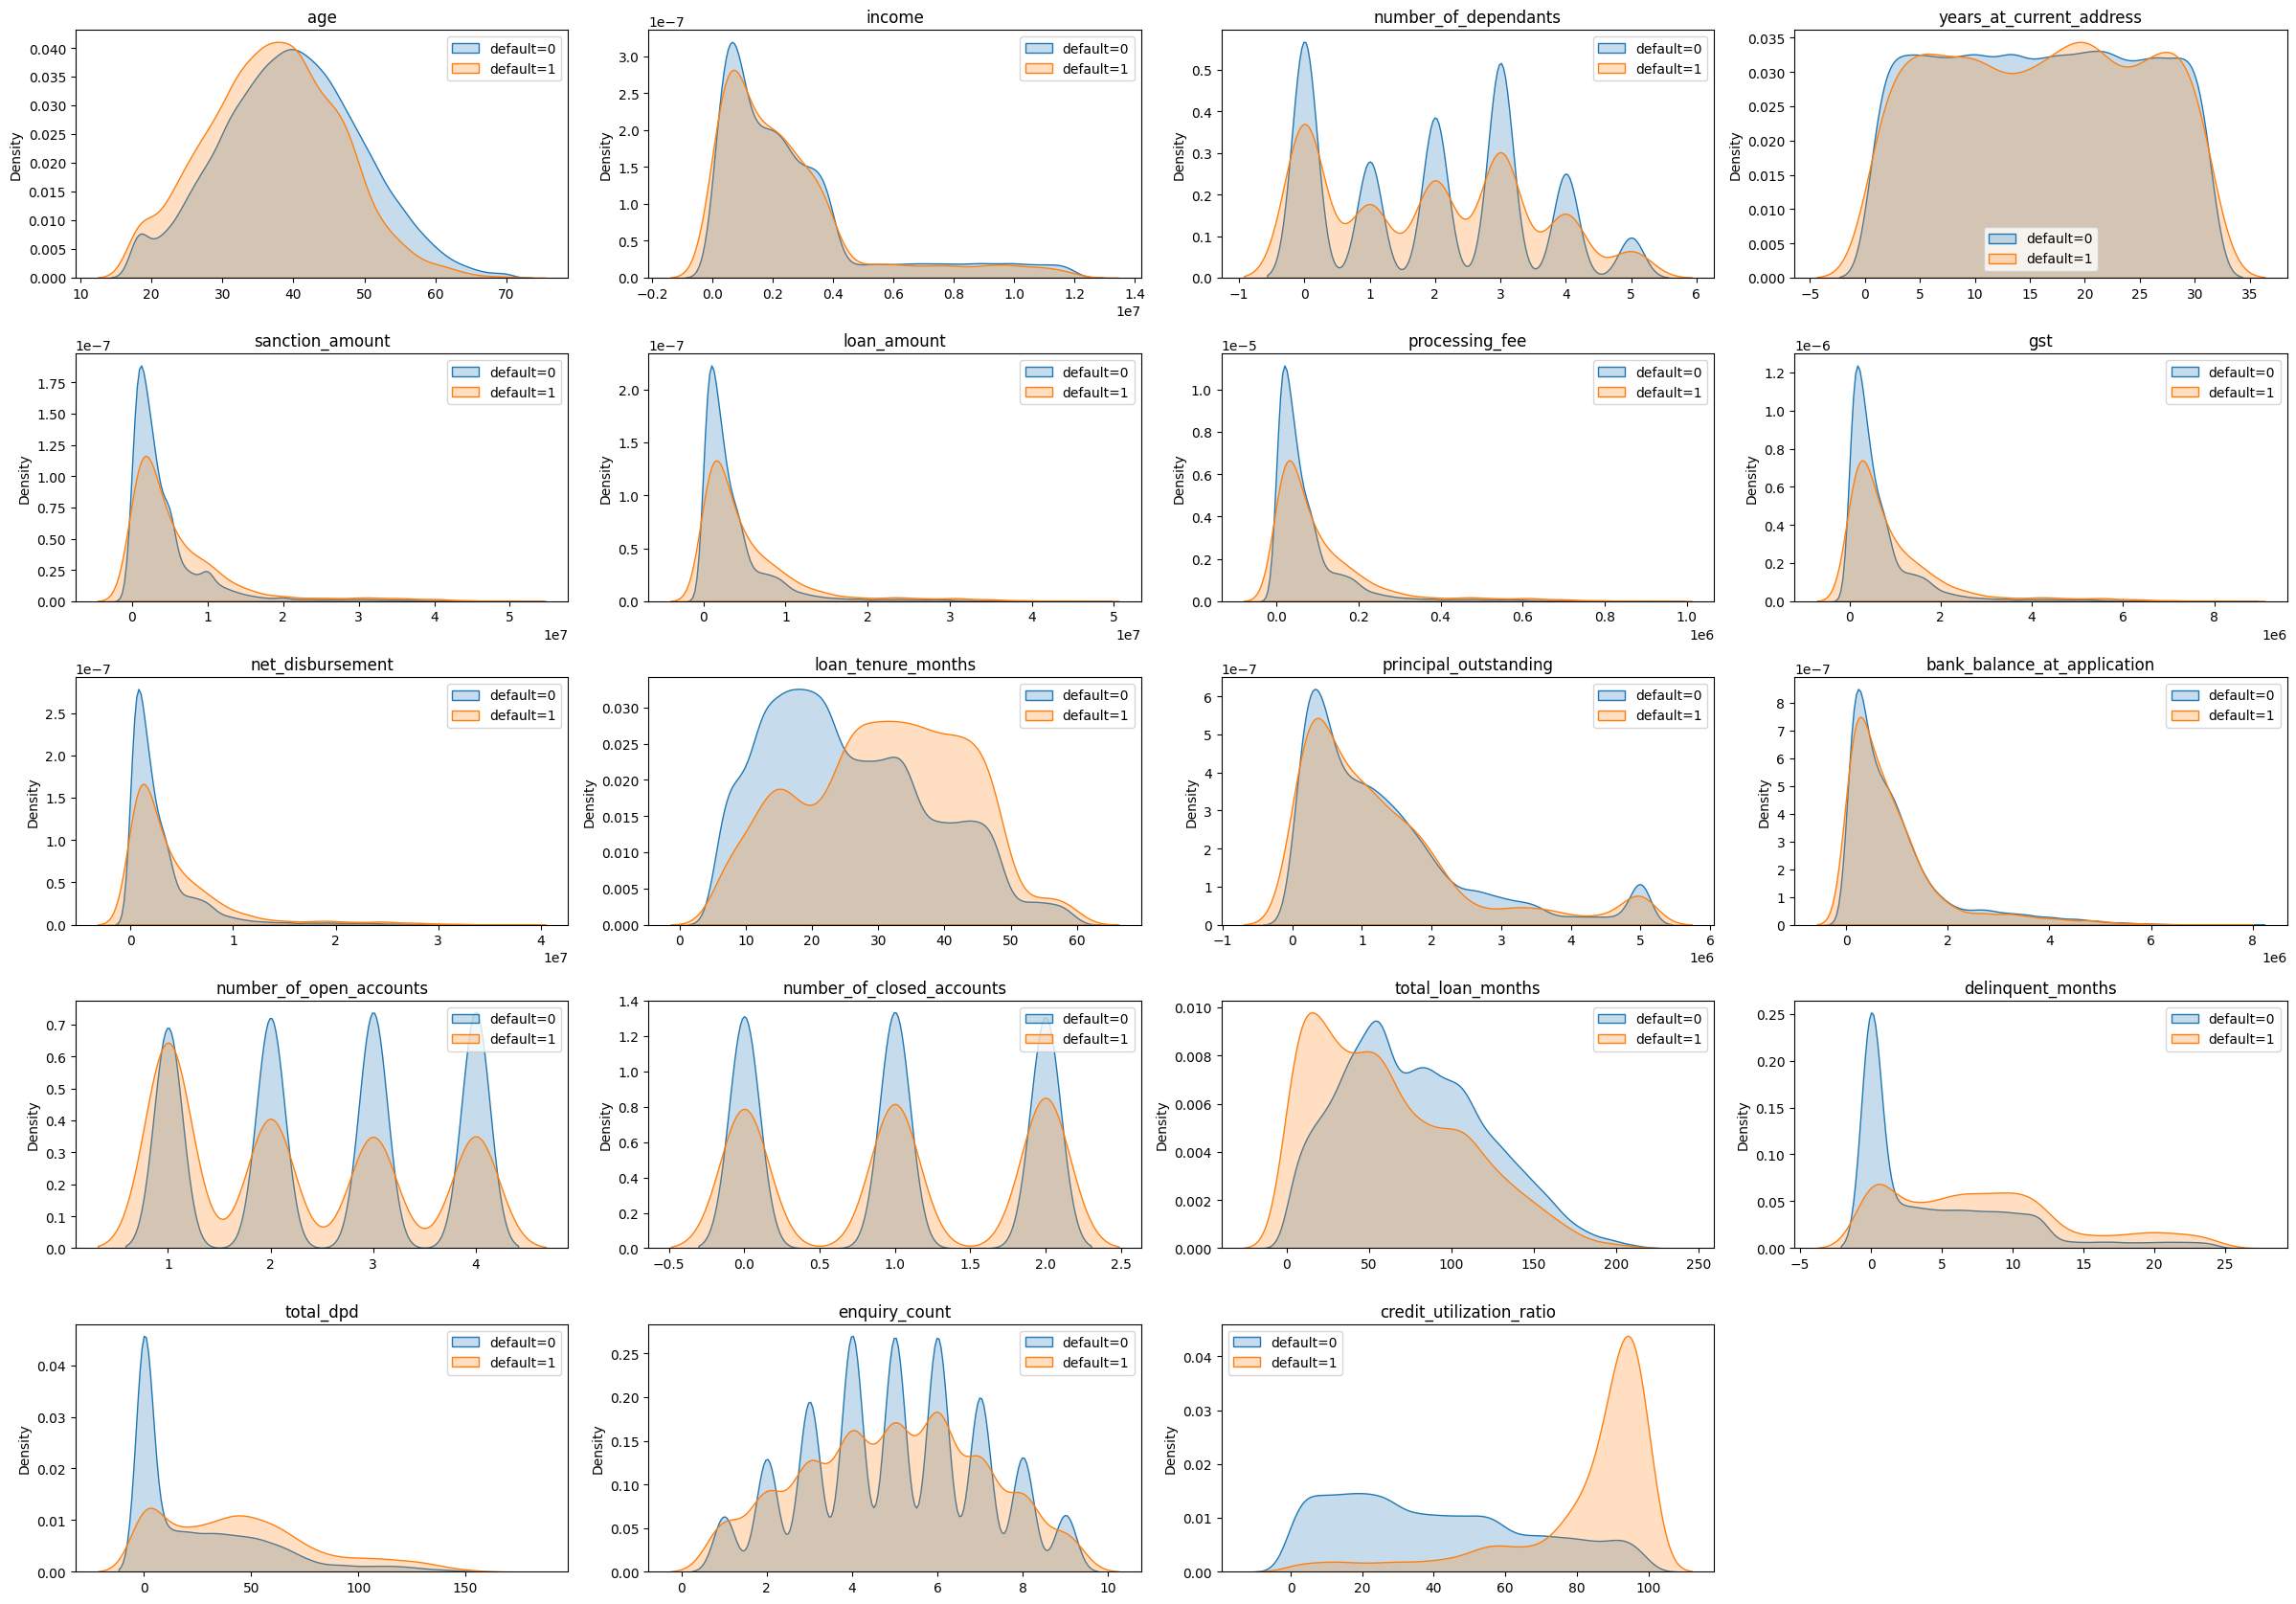

In [48]:
plt.figure(figsize=(24, 20))  # Width, height in inches

# Iterate through the continuous columns and plot KDEs
for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i + 1)  # 6 rows, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default'] == 0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default'] == 1], fill=True, label='default=1')
    plt.title(col)  # Set the title for the subplot
    plt.xlabel('')  # Remove x-axis label
    plt.legend()  # Add a legend for clarity

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Feature Engineering, Feature Selection


In [49]:
df_train_1[['loan_amount','income']].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [50]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count    37488.00
mean         1.56
std          0.97
min          0.30
25%          0.77
50%          1.16
75%          2.46
max          4.57
Name: loan_to_income, dtype: float64

In [51]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

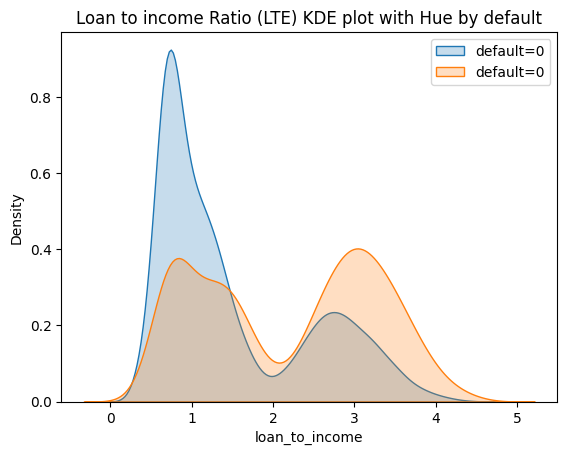

In [52]:
plt.Figure(figsize=(8,4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==0],fill=True,label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default']==1],fill=True,label='default=0')
plt.title(f'Loan to income Ratio (LTE) KDE plot with Hue by default')
plt.legend()
plt.show()

In [53]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

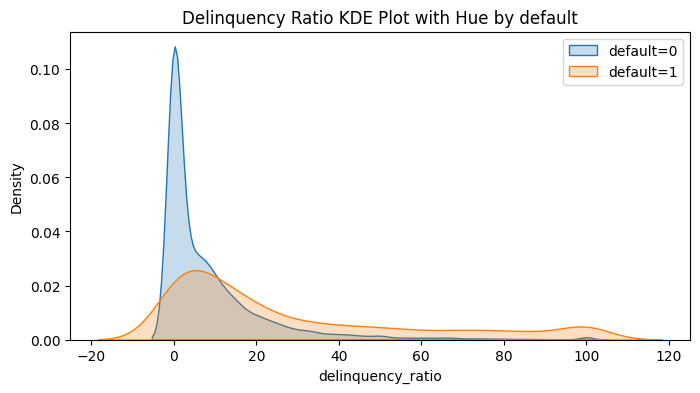

In [54]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()


In [55]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquency_ratio'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

In [56]:
df_train_1['avg_dpd_per_delinquency']

12746    5.90
32495    6.20
43675    5.60
9040     0.00
13077    0.00
         ... 
28515    0.00
5558     5.10
45236    4.00
49228    0.00
37784    6.40
Name: avg_dpd_per_delinquency, Length: 37488, dtype: float64

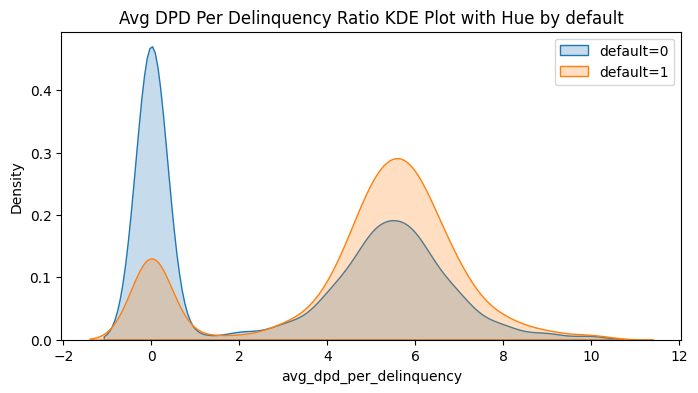

In [57]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

### Remove columns that are just unique ids and don't have influence on target

In [58]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'],axis='columns')
df_test = df_test.drop(['cust_id','loan_id'],axis='columns')


### Remove columns that business contact person asked us to remove

In [60]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
df_train.select_dtypes(['int64','float64']).columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

VIF to measure multicolienarity

In [62]:
X_train = df_train_3.drop('default',axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64','float64']).columns
scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Same transformation on test set

In [63]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [65]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,0.42,1.00,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,0.83,0.09,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62


In [66]:
calculate_vif(X_train[cols_to_scale])


c:\Users\LAKSHAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [67]:
features_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif,axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [68]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df 

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [69]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [70]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

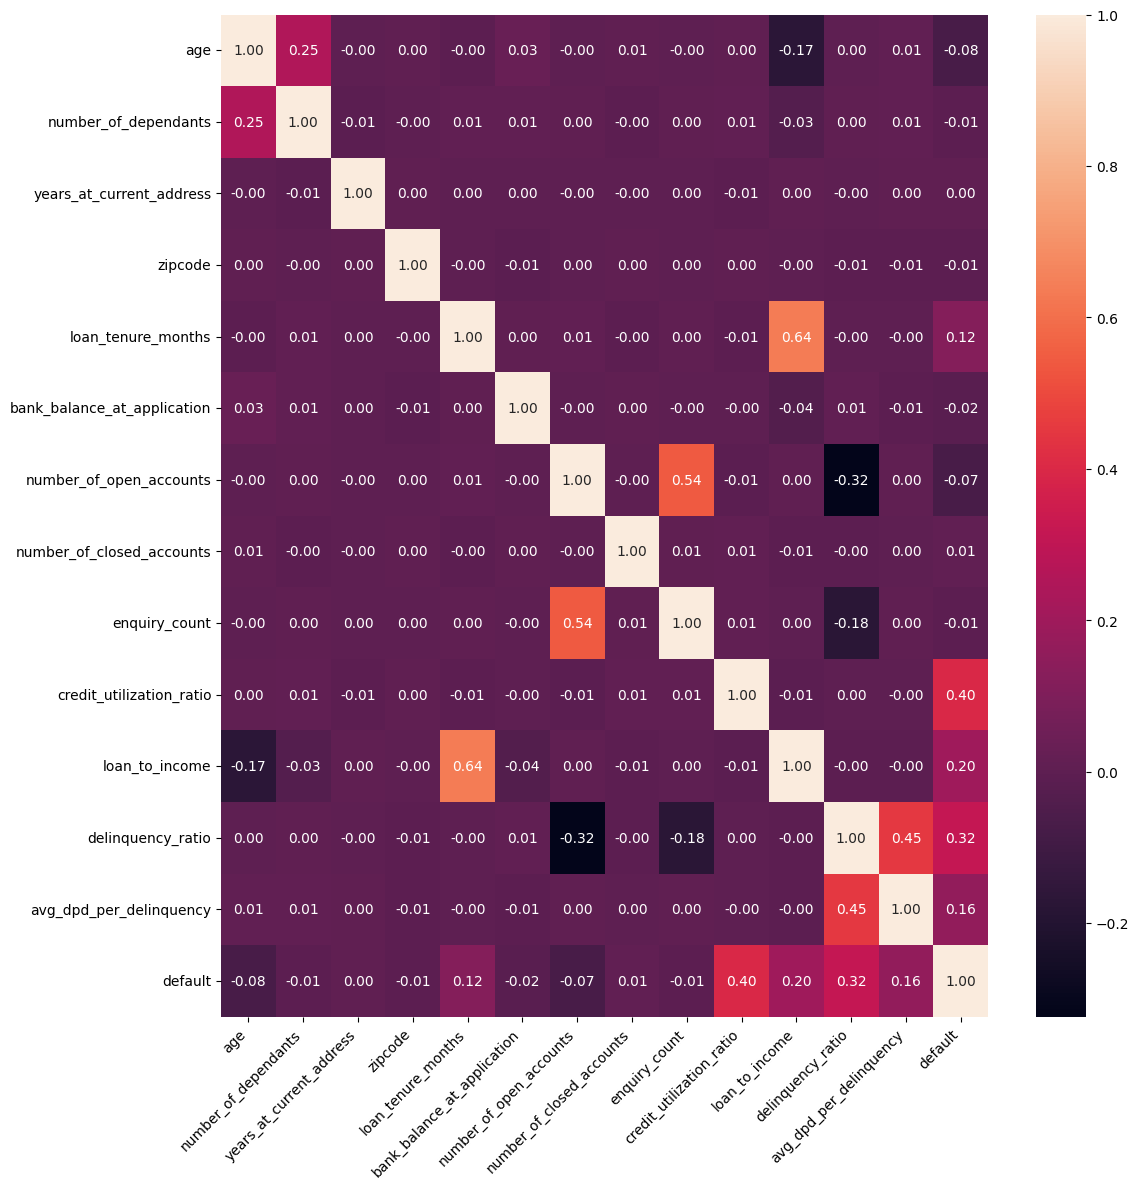

In [71]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True,fmt='0.2f')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature selection in categorical features


In [72]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.79,M,Married,Self-Employed,0.60,Owned,0.97,Hyderabad,Telangana,0.66,...,Secured,0.42,0.61,1.00,1.00,0.38,0.36,0.41,0.13,0.59
32495,0.50,F,Single,Salaried,0.00,Owned,0.87,Mumbai,Maharashtra,0.49,...,Secured,0.83,0.03,0.67,0.50,0.50,0.05,0.31,0.06,0.62
43675,0.38,M,Single,Salaried,0.00,Mortgage,0.83,Chennai,Tamil Nadu,0.83,...,Secured,0.49,0.17,0.00,0.50,0.38,0.00,0.76,0.22,0.56
9040,0.46,M,Married,Salaried,0.40,Mortgage,0.97,Bangalore,Karnataka,0.76,...,Secured,0.64,0.08,0.67,0.00,0.88,0.88,0.19,0.00,0.00
13077,0.77,M,Married,Self-Employed,0.80,Owned,0.93,Pune,Maharashtra,0.51,...,Unsecured,0.17,0.07,0.00,1.00,0.00,0.72,0.05,0.00,0.00


In [73]:
def calculate_woe_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good']/ total_good
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']
    
    grouped['woe']=grouped['woe'].replace([np.inf, -np.inf],0)
    grouped['iv'] = grouped['iv'].replace([np.inf,-np.inf],0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1), 'loan_purpose','default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [74]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [75]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype =='object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv

iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [76]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()),columns=['feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [77]:
selected_features_iv = [feature for feature, iv in iv_values.items() if iv >0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### feature Encaoding

In [78]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [79]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


In [80]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,True,False,False,False,False,False
35347,0.365,0.755,1.000,0.485,0.571,0.024,0.700,True,False,False,True,False,False
41814,0.577,0.717,0.667,0.980,0.407,0.107,0.640,False,False,False,True,False,False


# Model Training

## Attempt 1

1. logistic Regression, RandomForest AND XGB <br>
2, No handeling of class imbanlance

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



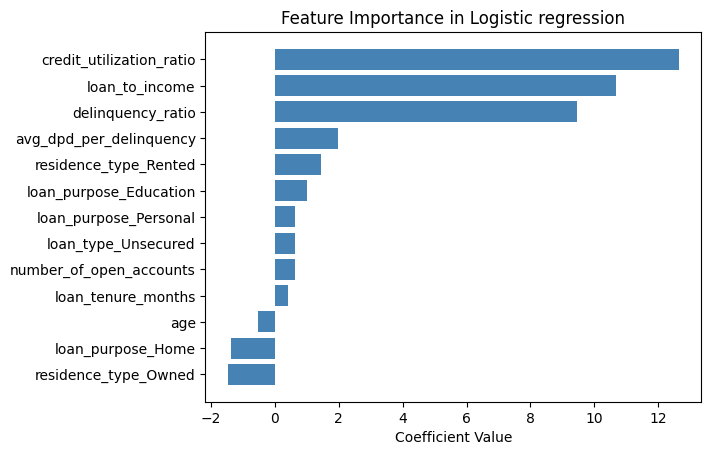

In [82]:
feature_importance = model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns,columns=['Coefficients'])

coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.Figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic regression')
plt.show()

In [83]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better inerpretation


### RandomizedSearch CV for Attempt 1: Logistic Regression

In [84]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4,4,20),
    'solver' : ['lbfgs','saga','liblinear','newton-cg']
}

log_reg = LogisticRegression(max_iter=10000)

random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train_encoded, y_train)

print(f'Best parameters: {random_search.best_params_}')
print(f'best Score:  {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print('classification_report : ')
print(classification_report(y_test,y_pred))

Best parameters: {'solver': 'liblinear', 'C': np.float64(1438.44988828766)}
best Score:  0.7578820896729832
classification_report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



### RandomizedSearch CV for Attempt 1: XG boost

In [85]:
from scipy.stats import uniform,randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth':[3,4,5,6,7,8,9,10],
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2,0.25,0.3],
    'subsample': [0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight': [1,2,3,5,7,10],
    'reg_alpha':[0.01,0.1,0.5,1.0,5.0,10.0],# l1 regularization
    'reg_lambda':[0.01,0.1,0.5,1.0,5.0,10.0]#l2 regularization
}
xgb = XGBClassifier()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_encoded,y_train)

print(f'Best parameters: {random_search.best_params_}')
print(f'best score: {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print('classification_report: ')
print(classification_report(y_test,y_pred))




Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\LAKSHAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LAKSHAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LAKSHAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\LAKSHAY\AppData\Local\Programs\P

Best parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
best score: 0.7871111337608833
classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.82      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



In [86]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 10.0, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
Best Score: 0.7871111337608833
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.78      0.82      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB </br>
2. Handel class imbalance using under sampling


In [87]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded,y_train)
y_train_res.value_counts()


default
0    3223
1    3223
Name: count, dtype: int64

In [88]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [89]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res,y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.52      0.99      0.68      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.95      0.82     12497
weighted avg       0.96      0.92      0.93     12497



### Atempt 3

1. Logistic Regression
2. handle class imbalance Using SMOTE Tomek
3. parameter tunning using optuna

In [90]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34195
1    34195
Name: count, dtype: int64

In [91]:
model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [92]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

c:\Users\LAKSHAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4,1e4, log=True), # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs','liblinear','saga', 'newton-cg']),# Solver
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True ), # logarithmically spaced valus for tolerance
        'class_weight': trial.suggest_categorical('class_weight',[None,'balanced']) # Claa weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2024-12-30 18:00:03,945] A new study created in memory with name: no-name-99879920-ad7a-4f90-b919-9789b488feee
[I 2024-12-30 18:00:05,421] Trial 0 finished with value: 0.8499218531949326 and parameters: {'C': 0.00023080844543268587, 'solver': 'saga', 'tol': 6.8423902956181655e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8499218531949326.
[I 2024-12-30 18:00:06,056] Trial 1 finished with value: 0.9246035651344008 and parameters: {'C': 0.013909925521702605, 'solver': 'liblinear', 'tol': 0.00016064942010868708, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9246035651344008.
[I 2024-12-30 18:00:07,447] Trial 2 finished with value: 0.9456794085990863 and parameters: {'C': 3922.4886704657292, 'solver': 'newton-cg', 'tol': 2.7427705375205737e-06, 'class_weight': None}. Best is trial 2 with value: 0.9456794085990863.
[I 2024-12-30 18:00:07,858] Trial 3 finished with value: 0.9382291995902978 and parameters: {'C': 7495.137711551951, 'solver': 'lbfgs', 'tol': 0

In [94]:
print('Best trial:')
trial = study_logistic.best_trial
print(' F!-score: {}'.format(trial.value))
print(' Params: ')
for key, value in trial.params.items():
    print('   {}: {}'. format(key,value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

Best trial:
 F!-score: 0.9458378636399077
 Params: 
   C: 2.1443953252135897
   solver: newton-cg
   tol: 3.2628931149067534e-06
   class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4
1. XGBoost
2. handle class imbalance Using SMOTE Tomek
3. parameter tunning using optuna

In [95]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample',0.4,1.0),
        'colsample_bytree': trial.suggest_float('subsample',0.4,1.0),
        'max_depth': trial.suggest_int('max_depth',3,10),
        'eta': trial.suggest_float('eta', 0.01,0.3),
        'gamma': trial.suggest_float('gamma',0,10),
        'scale_pos_weitht': trial.suggest_float('scale_pos_weight',1,10),
        'min_child_weight': trial.suggest_int('min_child_weight',1,10),
        'max_delta_step': trial.suggest_int('max_delta_step',0,10)

    }

    model = XGBClassifier(**param)

    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt,y_train_smt, cv=3,scoring=f1_scorer,n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2024-12-30 18:00:37,787] A new study created in memory with name: no-name-0d68c25b-fb49-4813-8b9b-68ed00ad8ad7
[I 2024-12-30 18:00:39,268] Trial 0 finished with value: 0.9687895472248614 and parameters: {'lambda': 0.0032503363163634107, 'alpha': 0.05438279363299553, 'subsample': 0.9394870783285326, 'max_depth': 4, 'eta': 0.17143319661692663, 'gamma': 1.6942739072892032, 'scale_pos_weight': 4.177738195770425, 'min_child_weight': 1, 'max_delta_step': 8}. Best is trial 0 with value: 0.9687895472248614.
[I 2024-12-30 18:00:40,847] Trial 1 finished with value: 0.9691122804563852 and parameters: {'lambda': 0.2339782315009002, 'alpha': 0.3294423387957781, 'subsample': 0.7014908751895568, 'max_depth': 8, 'eta': 0.23219732097792695, 'gamma': 8.28847850678731, 'scale_pos_weight': 5.678359416692702, 'min_child_weight': 1, 'max_delta_step': 7}. Best is trial 1 with value: 0.9691122804563852.
[I 2024-12-30 18:00:42,288] Trial 2 finished with value: 0.9595613588841401 and parameters: {'lambda': 8

In [96]:
print('Best trial: ')
trial = study_xgb.best_trial
print('F1-score: {}'.format(trial.value))
print(' Params: ')
for key,value in trial.params.items():
    print('     {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt,y_train_smt)

y_pred = best_model_xgb.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

Best trial: 
F1-score: 0.9770544537420663
 Params: 
     lambda: 0.0029209009155180556
     alpha: 0.05552683249724278
     subsample: 0.7033231928819781
     max_depth: 10
     eta: 0.15043800804594543
     gamma: 0.5692702855266109
     scale_pos_weight: 1.8799110746602625
     min_child_weight: 5
     max_delta_step: 3
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.71      0.88      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Model Evaluation : ROC/AUC

In [97]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [98]:
from sklearn.metrics import  roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754]),
 array([0.        , 0.0009311 , 0.16294227, 0.16294227, 0.17877095]),
 array([       inf, 1.        , 0.99937262, 0.99936417, 0.99922814]))

In [99]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
area


np.float64(0.9836992926975551)

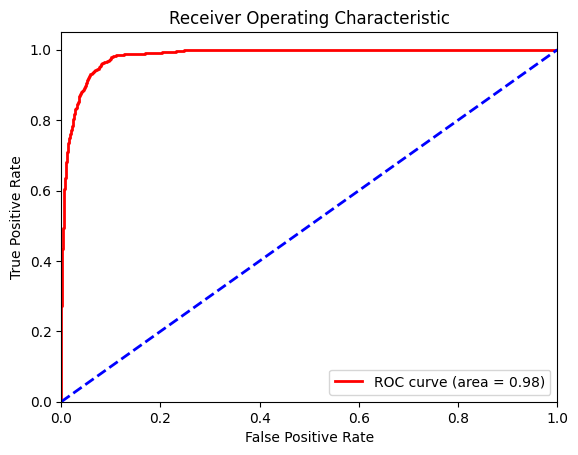

In [100]:
plt.figure()
plt.plot(fpr,tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0,1],[0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Model Evaluation : rank ordering,KS statistic, Gini coeff

In [101]:
probabilities = best_model_xgb.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth' : y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.641
15514,0,0.000
30367,0,0.000


In [102]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'],10,labels=False,duplicates='drop')
df_eval.head()

,Default Truth,Default Probability,Decile
19205,0,0.641,9
15514,0,0.000,1
30367,0,0.000,4
35347,0,0.000,4
41814,1,0.974,9


In [103]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\LAKSHAY\AppData\Local\Temp\ipykernel_12148\482895170.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.000,0.000,1250.000
5,5,0.000,0.001,0.000,1249.000
6,6,0.001,0.002,0.000,1250.000
7,7,0.002,0.011,8.000,1241.000
8,8,0.011,0.586,158.000,1092.000
9,9,0.586,1.000,908.000,342.000


In [104]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events'] + df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events'] + df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.000,0.000,1250.000,0.000,100.000
5,5,0.000,0.001,0.000,1249.000,0.000,100.000
6,6,0.001,0.002,0.000,1250.000,0.000,100.000
7,7,0.002,0.011,8.000,1241.000,0.641,99.359
8,8,0.011,0.586,158.000,1092.000,12.640,87.360
9,9,0.586,1.000,908.000,342.000,72.640,27.360


In [105]:
df_decile = df_decile.sort_values(by='Decile',ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.586,1.000,908.000,342.000,72.640,27.360
1,8,0.011,0.586,158.000,1092.000,12.640,87.360
2,7,0.002,0.011,8.000,1241.000,0.641,99.359
3,6,0.001,0.002,0.000,1250.000,0.000,100.000
4,5,0.000,0.001,0.000,1249.000,0.000,100.000
5,4,0.000,0.000,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [106]:
df_decile['Cum Events'] = df_decile['Events'].cumsum()
df_decile['Cum Non-events'] = df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.586,1.000,908.000,342.000,72.640,27.360,908.000,342.000
1,8,0.011,0.586,158.000,1092.000,12.640,87.360,1066.000,1434.000
2,7,0.002,0.011,8.000,1241.000,0.641,99.359,1074.000,2675.000
3,6,0.001,0.002,0.000,1250.000,0.000,100.000,1074.000,3925.000
4,5,0.000,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [107]:
df_decile['Cum Event Rate'] = df_decile['Cum Events']*100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.586,1.000,908.000,342.000,72.640,27.360,908.000,342.000,84.544,2.994
1,8,0.011,0.586,158.000,1092.000,12.640,87.360,1066.000,1434.000,99.255,12.554
2,7,0.002,0.011,8.000,1241.000,0.641,99.359,1074.000,2675.000,100.000,23.418
3,6,0.001,0.002,0.000,1250.000,0.000,100.000,1074.000,3925.000,100.000,34.361
4,5,0.000,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [108]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.586,1.000,908.000,342.000,72.640,27.360,908.000,342.000,84.544,2.994,81.550
1,8,0.011,0.586,158.000,1092.000,12.640,87.360,1066.000,1434.000,99.255,12.554,86.702
2,7,0.002,0.011,8.000,1241.000,0.641,99.359,1074.000,2675.000,100.000,23.418,76.582
3,6,0.001,0.002,0.000,1250.000,0.000,100.000,1074.000,3925.000,100.000,34.361,65.639
4,5,0.000,0.001,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [109]:
gini_coefficient = 2*area - 1

print("AUC:",area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836992926975551
Gini Coefficient: 0.9673985853951101


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

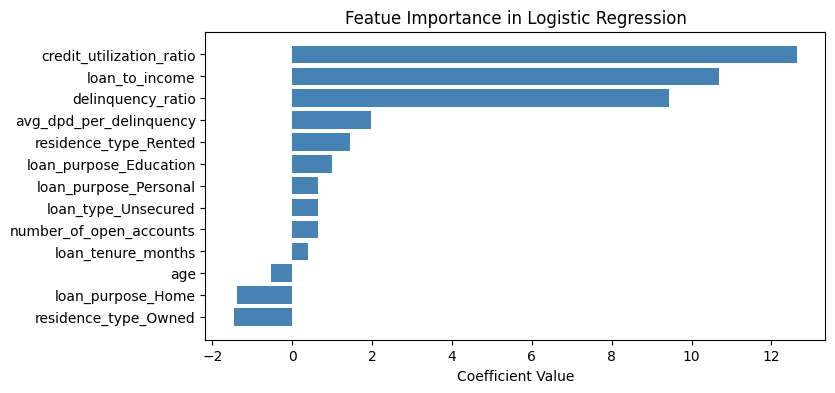

In [116]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create dataframe for easier handling
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

#ploting
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Featue Importance in Logistic Regression')
plt.show()

## Save the Model

In [117]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [118]:
X_test_encoded.columns


Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [119]:
cols_to_scale


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [120]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [122]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [123]:
final_model.coef_, final_model.intercept_

(array([[-0.09179037,  0.62639171,  1.15485487, 15.72012146, 16.87410667,
         13.51209692,  2.04034255, -1.81980061,  1.82829403,  1.02486275,
         -3.2696861 ,  1.02960958,  1.02960958]]),
 array([-20.41867777]))